### 5 Crossfold Validation for 1-layer Model
##### 80:20 split for each crossfold validation step

In [1]:
import sys
sys.path.append('..')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from core.getdata import *
from core.dataset import *
from core.network import *
from core.trainer import *
from core.visualization import *

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [4]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
replicas, size = 2, 1288

In [5]:
load_dir = '../models/cfv/'
save_dir = '../models/cfv/'
save_name = 'mmkfcv'

In [6]:
#model parameters
input_size = 1 
hidden_sizes = 98
output_size = 9
num_layers = 1

#training parameters
n_epochs = 80
batch_size = 65
learning_rate = 1e-3

#device
torch.cuda.is_available()
device = torch.device("cuda:0")

### Empty Model for CV
* only need to execute this cell once

In [7]:
# net = LSTM(input_size, hidden_sizes, output_size, num_layers=num_layers, device=device)
# net.train()
# model = LSTMTrainer(model=net, device=device)

In [8]:
# model.save('../models/' + 'empty.pth')

### CFV 1

In [9]:
data1 = DatasetPolar(ligands, polarization, replicas, size)
k = 5

In [10]:
net1 = LSTM(input_size, hidden_sizes, output_size, num_layers=num_layers, device=device)
net1.train()

LSTM(
  (lstm): LSTM(1, 98, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [11]:
model1 = LSTMTrainer(model=net1, device=device)

In [12]:
model1.kfcv(data1, k, save_name, batch_size=batch_size, n_epochs=n_epochs)

  1%|█                                                                                  | 1/80 [00:05<07:25,  5.64s/it]

Epoch 001: | Training Loss: 2.1168204303656784 | Validation Loss: 2.1135621689190374


  2%|██                                                                                 | 2/80 [00:10<06:34,  5.06s/it]

Epoch 002: | Training Loss: 2.1610552540449337 | Validation Loss: 2.1937997274309677


  4%|███                                                                                | 3/80 [00:14<06:15,  4.88s/it]

Epoch 003: | Training Loss: 2.167443157495739 | Validation Loss: 2.0785245934379435


  5%|████▏                                                                              | 4/80 [00:19<06:03,  4.79s/it]

Epoch 004: | Training Loss: 2.172166039871278 | Validation Loss: 2.181368899122577


  6%|█████▏                                                                             | 5/80 [00:24<05:55,  4.74s/it]

Epoch 005: | Training Loss: 2.156168116726608 | Validation Loss: 2.2003381196583542


  8%|██████▏                                                                            | 6/80 [00:28<05:49,  4.72s/it]

Epoch 006: | Training Loss: 2.1373779209696244 | Validation Loss: 2.095153451522934


  9%|███████▎                                                                           | 7/80 [00:33<05:43,  4.70s/it]

Epoch 007: | Training Loss: 2.101821506413344 | Validation Loss: 2.01353534304093


 10%|████████▎                                                                          | 8/80 [00:38<05:40,  4.73s/it]

Epoch 008: | Training Loss: 2.032761537722338 | Validation Loss: 1.974638749505872


 11%|█████████▎                                                                         | 9/80 [00:43<05:34,  4.71s/it]

Epoch 009: | Training Loss: 1.8670143379229251 | Validation Loss: 1.8317518033713938


 12%|██████████▎                                                                       | 10/80 [00:47<05:29,  4.70s/it]

Epoch 010: | Training Loss: 1.7519253102418417 | Validation Loss: 1.7223885666544192


 14%|███████████▎                                                                      | 11/80 [00:52<05:23,  4.68s/it]

Epoch 011: | Training Loss: 1.7036329119283462 | Validation Loss: 1.6868075115658412


 15%|████████████▎                                                                     | 12/80 [00:57<05:18,  4.68s/it]

Epoch 012: | Training Loss: 1.6669806020560665 | Validation Loss: 1.682083444617619


 16%|█████████████▎                                                                    | 13/80 [01:01<05:14,  4.69s/it]

Epoch 013: | Training Loss: 1.6363584060813778 | Validation Loss: 1.6392003999692257


 18%|██████████████▎                                                                   | 14/80 [01:06<05:13,  4.74s/it]

Epoch 014: | Training Loss: 1.609062177973373 | Validation Loss: 1.618324568895536


 19%|███████████████▍                                                                  | 15/80 [01:11<05:06,  4.72s/it]

Epoch 015: | Training Loss: 1.585545111900178 | Validation Loss: 1.5762909377846763


 20%|████████████████▍                                                                 | 16/80 [01:16<05:01,  4.71s/it]

Epoch 016: | Training Loss: 1.5652010580089604 | Validation Loss: 1.5764068816309778


 21%|█████████████████▍                                                                | 17/80 [01:20<04:56,  4.71s/it]

Epoch 017: | Training Loss: 1.5483529524546917 | Validation Loss: 1.5514283024262046


 22%|██████████████████▍                                                               | 18/80 [01:25<04:50,  4.69s/it]

Epoch 018: | Training Loss: 1.5260299735258673 | Validation Loss: 1.5144583822410798


 24%|███████████████████▍                                                              | 19/80 [01:30<04:46,  4.70s/it]

Epoch 019: | Training Loss: 1.5063120665672785 | Validation Loss: 1.493585987625835


 25%|████████████████████▌                                                             | 20/80 [01:34<04:41,  4.70s/it]

Epoch 020: | Training Loss: 1.4858990736375346 | Validation Loss: 1.495974159686365


 26%|█████████████████████▌                                                            | 21/80 [01:39<04:38,  4.72s/it]

Epoch 021: | Training Loss: 1.4692252744859624 | Validation Loss: 1.4886039261505983


 28%|██████████████████████▌                                                           | 22/80 [01:44<04:33,  4.72s/it]

Epoch 022: | Training Loss: 1.449859812437931 | Validation Loss: 1.458539902606857


 29%|███████████████████████▌                                                          | 23/80 [01:48<04:29,  4.73s/it]

Epoch 023: | Training Loss: 1.432511782674032 | Validation Loss: 1.452467247704479


 30%|████████████████████████▌                                                         | 24/80 [01:53<04:25,  4.73s/it]

Epoch 024: | Training Loss: 1.4216417249675108 | Validation Loss: 1.4144149088413915


 31%|█████████████████████████▋                                                        | 25/80 [01:58<04:20,  4.73s/it]

Epoch 025: | Training Loss: 1.4017490194501163 | Validation Loss: 1.4328664268288658


 32%|██████████████████████████▋                                                       | 26/80 [02:03<04:15,  4.74s/it]

Epoch 026: | Training Loss: 1.3941370293358777 | Validation Loss: 1.3902451836060141


 34%|███████████████████████████▋                                                      | 27/80 [02:07<04:10,  4.73s/it]

Epoch 027: | Training Loss: 1.3729719707620478 | Validation Loss: 1.371889343885618


 35%|████████████████████████████▋                                                     | 28/80 [02:12<04:05,  4.73s/it]

Epoch 028: | Training Loss: 1.3580701262037331 | Validation Loss: 1.3886755922130336


 36%|█████████████████████████████▋                                                    | 29/80 [02:17<04:00,  4.72s/it]

Epoch 029: | Training Loss: 1.3567203501953142 | Validation Loss: 1.3685524497076729


 38%|██████████████████████████████▊                                                   | 30/80 [02:22<03:56,  4.74s/it]

Epoch 030: | Training Loss: 1.334275762541829 | Validation Loss: 1.381419571760659


 39%|███████████████████████████████▊                                                  | 31/80 [02:26<03:51,  4.73s/it]

Epoch 031: | Training Loss: 1.3286776345606162 | Validation Loss: 1.3502029433985736


 40%|████████████████████████████████▊                                                 | 32/80 [02:31<03:46,  4.73s/it]

Epoch 032: | Training Loss: 1.3149656284356785 | Validation Loss: 1.346601499018268


 41%|█████████████████████████████████▊                                                | 33/80 [02:36<03:42,  4.73s/it]

Epoch 033: | Training Loss: 1.308348996547338 | Validation Loss: 1.3223799182989886


 42%|██████████████████████████████████▊                                               | 34/80 [02:41<03:37,  4.73s/it]

Epoch 034: | Training Loss: 1.300090073773237 | Validation Loss: 1.3143806062012076


 44%|███████████████████████████████████▉                                              | 35/80 [02:45<03:32,  4.73s/it]

Epoch 035: | Training Loss: 1.2871664061306793 | Validation Loss: 1.305863742794946


 45%|████████████████████████████████████▉                                             | 36/80 [02:50<03:28,  4.74s/it]

Epoch 036: | Training Loss: 1.2764895265904543 | Validation Loss: 1.3048212224635007


 46%|█████████████████████████████████████▉                                            | 37/80 [02:55<03:23,  4.74s/it]

Epoch 037: | Training Loss: 1.2769494294145396 | Validation Loss: 1.3098400664106709


 48%|██████████████████████████████████████▉                                           | 38/80 [02:59<03:18,  4.73s/it]

Epoch 038: | Training Loss: 1.2647509657055418 | Validation Loss: 1.3168374781853684


 49%|███████████████████████████████████████▉                                          | 39/80 [03:04<03:14,  4.74s/it]

Epoch 039: | Training Loss: 1.269128763160416 | Validation Loss: 1.3110283354175425


 50%|█████████████████████████████████████████                                         | 40/80 [03:09<03:09,  4.74s/it]

Epoch 040: | Training Loss: 1.248968192628611 | Validation Loss: 1.311602778523882


 51%|██████████████████████████████████████████                                        | 41/80 [03:14<03:04,  4.74s/it]

Epoch 041: | Training Loss: 1.2441918423799712 | Validation Loss: 1.290892145901083


 52%|███████████████████████████████████████████                                       | 42/80 [03:18<03:00,  4.74s/it]

Epoch 042: | Training Loss: 1.234551430096693 | Validation Loss: 1.2777229079576296


 54%|████████████████████████████████████████████                                      | 43/80 [03:23<02:55,  4.74s/it]

Epoch 043: | Training Loss: 1.2272622756590352 | Validation Loss: 1.2761941490886368


 55%|█████████████████████████████████████████████                                     | 44/80 [03:28<02:50,  4.74s/it]

Epoch 044: | Training Loss: 1.2254048333825351 | Validation Loss: 1.2661020755767822


 56%|██████████████████████████████████████████████▏                                   | 45/80 [03:33<02:45,  4.73s/it]

Epoch 045: | Training Loss: 1.2128833834534494 | Validation Loss: 1.2588084011434395


 57%|███████████████████████████████████████████████▏                                  | 46/80 [03:37<02:40,  4.72s/it]

Epoch 046: | Training Loss: 1.2118595374800334 | Validation Loss: 1.2754966619415817


 59%|████████████████████████████████████████████████▏                                 | 47/80 [03:42<02:35,  4.72s/it]

Epoch 047: | Training Loss: 1.199206250223601 | Validation Loss: 1.241642360932359


 60%|█████████████████████████████████████████████████▏                                | 48/80 [03:47<02:31,  4.73s/it]

Epoch 048: | Training Loss: 1.1923675386008816 | Validation Loss: 1.2471087031832366


 61%|██████████████████████████████████████████████████▏                               | 49/80 [03:52<02:26,  4.74s/it]

Epoch 049: | Training Loss: 1.1748692021470204 | Validation Loss: 1.2341826764222616


 62%|███████████████████████████████████████████████████▎                              | 50/80 [03:56<02:21,  4.73s/it]

Epoch 050: | Training Loss: 1.1807595510906148 | Validation Loss: 1.2653075696151947


 64%|████████████████████████████████████████████████████▎                             | 51/80 [04:01<02:17,  4.74s/it]

Epoch 051: | Training Loss: 1.164027486797248 | Validation Loss: 1.2315968979741925


 65%|█████████████████████████████████████████████████████▎                            | 52/80 [04:06<02:12,  4.74s/it]

Epoch 052: | Training Loss: 1.1593997976351007 | Validation Loss: 1.234373936586291


 66%|██████████████████████████████████████████████████████▎                           | 53/80 [04:11<02:08,  4.75s/it]

Epoch 053: | Training Loss: 1.1482792892884985 | Validation Loss: 1.2350274232503409


 68%|███████████████████████████████████████████████████████▎                          | 54/80 [04:15<02:03,  4.76s/it]

Epoch 054: | Training Loss: 1.1474628130966258 | Validation Loss: 1.2448508803532503


 69%|████████████████████████████████████████████████████████▍                         | 55/80 [04:20<01:59,  4.76s/it]

Epoch 055: | Training Loss: 1.1297662701005133 | Validation Loss: 1.2231208389607546


 70%|█████████████████████████████████████████████████████████▍                        | 56/80 [04:25<01:54,  4.75s/it]

Epoch 056: | Training Loss: 1.1601773984382087 | Validation Loss: 1.2260001939590845


 71%|██████████████████████████████████████████████████████████▍                       | 57/80 [04:30<01:49,  4.74s/it]

Epoch 057: | Training Loss: 1.1468619457750677 | Validation Loss: 1.2243641294608607


 72%|███████████████████████████████████████████████████████████▍                      | 58/80 [04:34<01:44,  4.75s/it]

Epoch 058: | Training Loss: 1.1138849834972453 | Validation Loss: 1.2656051302067588


 74%|████████████████████████████████████████████████████████████▍                     | 59/80 [04:39<01:40,  4.78s/it]

Epoch 059: | Training Loss: 1.114291517464357 | Validation Loss: 1.2258108756809591


 75%|█████████████████████████████████████████████████████████████▌                    | 60/80 [04:44<01:35,  4.77s/it]

Epoch 060: | Training Loss: 1.0934306699260372 | Validation Loss: 1.195936490999204


 76%|██████████████████████████████████████████████████████████████▌                   | 61/80 [04:49<01:30,  4.76s/it]

Epoch 061: | Training Loss: 1.1070487772889226 | Validation Loss: 1.2019253077908096


 78%|███████████████████████████████████████████████████████████████▌                  | 62/80 [04:53<01:25,  4.75s/it]

Epoch 062: | Training Loss: 1.0960772652353081 | Validation Loss: 1.2306176000666396


 79%|████████████████████████████████████████████████████████████████▌                 | 63/80 [04:58<01:20,  4.75s/it]

Epoch 063: | Training Loss: 1.0864736321512785 | Validation Loss: 1.195368998518614


 80%|█████████████████████████████████████████████████████████████████▌                | 64/80 [05:03<01:15,  4.74s/it]

Epoch 064: | Training Loss: 1.076558832949567 | Validation Loss: 1.1924906033221807


 81%|██████████████████████████████████████████████████████████████████▋               | 65/80 [05:08<01:11,  4.74s/it]

Epoch 065: | Training Loss: 1.0651683271906087 | Validation Loss: 1.1793957026762383


 82%|███████████████████████████████████████████████████████████████████▋              | 66/80 [05:12<01:06,  4.75s/it]

Epoch 066: | Training Loss: 1.0720147287873465 | Validation Loss: 1.1635768524954253


 84%|████████████████████████████████████████████████████████████████████▋             | 67/80 [05:17<01:01,  4.76s/it]

Epoch 067: | Training Loss: 1.0637910281107805 | Validation Loss: 1.173165002715922


 85%|█████████████████████████████████████████████████████████████████████▋            | 68/80 [05:22<00:57,  4.79s/it]

Epoch 068: | Training Loss: 1.050702512055357 | Validation Loss: 1.3578597232003078


 86%|██████████████████████████████████████████████████████████████████████▋           | 69/80 [05:27<00:52,  4.78s/it]

Epoch 069: | Training Loss: 1.0474312567265234 | Validation Loss: 1.164525521135776


 88%|███████████████████████████████████████████████████████████████████████▊          | 70/80 [05:32<00:47,  4.78s/it]

Epoch 070: | Training Loss: 1.0276709374423338 | Validation Loss: 1.163332481529111


 89%|████████████████████████████████████████████████████████████████████████▊         | 71/80 [05:36<00:43,  4.78s/it]

Epoch 071: | Training Loss: 1.0632758838968857 | Validation Loss: 1.1665803497639773


 90%|█████████████████████████████████████████████████████████████████████████▊        | 72/80 [05:41<00:38,  4.77s/it]

Epoch 072: | Training Loss: 1.0376565179256636 | Validation Loss: 1.1695319960050494


 91%|██████████████████████████████████████████████████████████████████████████▊       | 73/80 [05:46<00:33,  4.76s/it]

Epoch 073: | Training Loss: 1.0189029828549545 | Validation Loss: 1.147936527417085


 92%|███████████████████████████████████████████████████████████████████████████▊      | 74/80 [05:51<00:28,  4.76s/it]

Epoch 074: | Training Loss: 1.012018930480302 | Validation Loss: 1.1490764033014529


 94%|████████████████████████████████████████████████████████████████████████████▉     | 75/80 [05:55<00:23,  4.76s/it]

Epoch 075: | Training Loss: 1.0074399680456267 | Validation Loss: 1.153625498586726


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 76/80 [06:00<00:19,  4.75s/it]

Epoch 076: | Training Loss: 1.0040886487776988 | Validation Loss: 1.1735280225767153


 96%|██████████████████████████████████████████████████████████████████████████████▉   | 77/80 [06:05<00:14,  4.75s/it]

Epoch 077: | Training Loss: 0.9929549712165494 | Validation Loss: 1.1359117326335373


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 78/80 [06:10<00:09,  4.75s/it]

Epoch 078: | Training Loss: 0.9927295305043737 | Validation Loss: 1.1543617493638367


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 79/80 [06:14<00:04,  4.76s/it]

Epoch 079: | Training Loss: 0.9919078625808252 | Validation Loss: 1.1344217318240728


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [06:19<00:00,  4.75s/it]


Epoch 080: | Training Loss: 0.9823676218217778 | Validation Loss: 1.1262593954523032


  1%|█                                                                                  | 1/80 [00:04<06:14,  4.74s/it]

Epoch 001: | Training Loss: 2.1241907611071507 | Validation Loss: 2.0987007974464205


  2%|██                                                                                 | 2/80 [00:09<06:09,  4.73s/it]

Epoch 002: | Training Loss: 2.148954084543424 | Validation Loss: 2.094317294169809


  4%|███                                                                                | 3/80 [00:14<06:04,  4.73s/it]

Epoch 003: | Training Loss: 2.0720946664843605 | Validation Loss: 2.119116939116861


  5%|████▏                                                                              | 4/80 [00:18<05:59,  4.73s/it]

Epoch 004: | Training Loss: 2.0577968098571366 | Validation Loss: 2.064938776960997


  6%|█████▏                                                                             | 5/80 [00:23<05:55,  4.74s/it]

Epoch 005: | Training Loss: 2.0868939910536612 | Validation Loss: 2.098074007257123


  8%|██████▏                                                                            | 6/80 [00:28<05:51,  4.75s/it]

Epoch 006: | Training Loss: 2.0341732261058327 | Validation Loss: 1.9981924133880116


  9%|███████▎                                                                           | 7/80 [00:33<05:46,  4.74s/it]

Epoch 007: | Training Loss: 2.020795535261386 | Validation Loss: 2.060440441715383


 10%|████████▎                                                                          | 8/80 [00:37<05:41,  4.74s/it]

Epoch 008: | Training Loss: 2.061928553001903 | Validation Loss: 2.129701901819104


 11%|█████████▎                                                                         | 9/80 [00:42<05:37,  4.75s/it]

Epoch 009: | Training Loss: 2.0474435000497606 | Validation Loss: 2.0219098173569297


 12%|██████████▎                                                                       | 10/80 [00:47<05:31,  4.74s/it]

Epoch 010: | Training Loss: 1.9805319323160937 | Validation Loss: 2.0160181566933604


 14%|███████████▎                                                                      | 11/80 [00:52<05:27,  4.74s/it]

Epoch 011: | Training Loss: 1.8762802152990181 | Validation Loss: 1.787330839678506


 15%|████████████▎                                                                     | 12/80 [00:56<05:21,  4.74s/it]

Epoch 012: | Training Loss: 1.7484398237734198 | Validation Loss: 1.7246090329696084


 16%|█████████████▎                                                                    | 13/80 [01:01<05:16,  4.73s/it]

Epoch 013: | Training Loss: 1.6942178264399554 | Validation Loss: 1.6783644038940144


 18%|██████████████▎                                                                   | 14/80 [01:06<05:12,  4.73s/it]

Epoch 014: | Training Loss: 1.6581830837737734 | Validation Loss: 1.646789653278957


 19%|███████████████▍                                                                  | 15/80 [01:11<05:08,  4.74s/it]

Epoch 015: | Training Loss: 1.6254137154215964 | Validation Loss: 1.6102633175448837


 20%|████████████████▍                                                                 | 16/80 [01:15<05:02,  4.73s/it]

Epoch 016: | Training Loss: 1.5948727849487947 | Validation Loss: 1.5810004534008346


 21%|█████████████████▍                                                                | 17/80 [01:20<04:57,  4.73s/it]

Epoch 017: | Training Loss: 1.5736727295356376 | Validation Loss: 1.6241370227849372


 22%|██████████████████▍                                                               | 18/80 [01:25<04:53,  4.73s/it]

Epoch 018: | Training Loss: 1.5504356589272759 | Validation Loss: 1.5581378396426406


 24%|███████████████████▍                                                              | 19/80 [01:29<04:47,  4.72s/it]

Epoch 019: | Training Loss: 1.5233798454576564 | Validation Loss: 1.5112522756941964


 25%|████████████████████▌                                                             | 20/80 [01:34<04:43,  4.73s/it]

Epoch 020: | Training Loss: 1.504544042816786 | Validation Loss: 1.5220526646230823


 26%|█████████████████████▌                                                            | 21/80 [01:39<04:38,  4.71s/it]

Epoch 021: | Training Loss: 1.4847251818837406 | Validation Loss: 1.4878062132363008


 28%|██████████████████████▌                                                           | 22/80 [01:44<04:33,  4.71s/it]

Epoch 022: | Training Loss: 1.4661679054810621 | Validation Loss: 1.4611344036654892


 29%|███████████████████████▌                                                          | 23/80 [01:48<04:28,  4.71s/it]

Epoch 023: | Training Loss: 1.4430190340102276 | Validation Loss: 1.4737720389232458


 30%|████████████████████████▌                                                         | 24/80 [01:53<04:25,  4.73s/it]

Epoch 024: | Training Loss: 1.4250136262902589 | Validation Loss: 1.425053678383337


 31%|█████████████████████████▋                                                        | 25/80 [01:58<04:20,  4.74s/it]

Epoch 025: | Training Loss: 1.4025339804520116 | Validation Loss: 1.413268067569376


 32%|██████████████████████████▋                                                       | 26/80 [02:03<04:16,  4.75s/it]

Epoch 026: | Training Loss: 1.3804444429751868 | Validation Loss: 1.3849580611023948


 34%|███████████████████████████▋                                                      | 27/80 [02:07<04:11,  4.74s/it]

Epoch 027: | Training Loss: 1.3577586696526716 | Validation Loss: 1.3668462104886492


 35%|████████████████████████████▋                                                     | 28/80 [02:12<04:06,  4.74s/it]

Epoch 028: | Training Loss: 1.347996516553598 | Validation Loss: 1.3588853639977


 36%|█████████████████████████████▋                                                    | 29/80 [02:17<04:01,  4.73s/it]

Epoch 029: | Training Loss: 1.3271509963914612 | Validation Loss: 1.3482014091215402


 38%|██████████████████████████████▊                                                   | 30/80 [02:22<03:57,  4.74s/it]

Epoch 030: | Training Loss: 1.3011460474161345 | Validation Loss: 1.3386782037320537


 39%|███████████████████████████████▊                                                  | 31/80 [02:26<03:52,  4.73s/it]

Epoch 031: | Training Loss: 1.2908084399510766 | Validation Loss: 1.3115597824069942


 40%|████████████████████████████████▊                                                 | 32/80 [02:31<03:47,  4.74s/it]

Epoch 032: | Training Loss: 1.2747258919282494 | Validation Loss: 1.2966832323609112


 41%|█████████████████████████████████▊                                                | 33/80 [02:36<03:43,  4.75s/it]

Epoch 033: | Training Loss: 1.2675467244932586 | Validation Loss: 1.315789778934461


 42%|██████████████████████████████████▊                                               | 34/80 [02:41<03:39,  4.77s/it]

Epoch 034: | Training Loss: 1.2577549457271522 | Validation Loss: 1.3423156167302177


 44%|███████████████████████████████████▉                                              | 35/80 [02:45<03:34,  4.77s/it]

Epoch 035: | Training Loss: 1.244234275246892 | Validation Loss: 1.2866145052085414


 45%|████████████████████████████████████▉                                             | 36/80 [02:50<03:30,  4.77s/it]

Epoch 036: | Training Loss: 1.2408792629977252 | Validation Loss: 1.2792438477556283


 46%|█████████████████████████████████████▉                                            | 37/80 [02:55<03:24,  4.76s/it]

Epoch 037: | Training Loss: 1.2240605980297115 | Validation Loss: 1.2871399858844614


 48%|██████████████████████████████████████▉                                           | 38/80 [03:00<03:19,  4.76s/it]

Epoch 038: | Training Loss: 1.2224082570070418 | Validation Loss: 1.2792232365251701


 49%|███████████████████████████████████████▉                                          | 39/80 [03:04<03:15,  4.76s/it]

Epoch 039: | Training Loss: 1.214200287778801 | Validation Loss: 1.2606561434603183


 50%|█████████████████████████████████████████                                         | 40/80 [03:09<03:10,  4.76s/it]

Epoch 040: | Training Loss: 1.2189504227070052 | Validation Loss: 1.2510167964708026


 51%|██████████████████████████████████████████                                        | 41/80 [03:14<03:05,  4.76s/it]

Epoch 041: | Training Loss: 1.1861742584504813 | Validation Loss: 1.2471923360200685


 52%|███████████████████████████████████████████                                       | 42/80 [03:19<03:01,  4.77s/it]

Epoch 042: | Training Loss: 1.1816026099095835 | Validation Loss: 1.233963858022868


 54%|████████████████████████████████████████████                                      | 43/80 [03:24<02:57,  4.79s/it]

Epoch 043: | Training Loss: 1.1706469206609458 | Validation Loss: 1.228876104700231


 55%|█████████████████████████████████████████████                                     | 44/80 [03:28<02:52,  4.80s/it]

Epoch 044: | Training Loss: 1.165554518245648 | Validation Loss: 1.2425585138463529


 56%|██████████████████████████████████████████████▏                                   | 45/80 [03:33<02:47,  4.79s/it]

Epoch 045: | Training Loss: 1.1725525495326408 | Validation Loss: 1.2404593493893883


 57%|███████████████████████████████████████████████▏                                  | 46/80 [03:38<02:42,  4.79s/it]

Epoch 046: | Training Loss: 1.1521263061979106 | Validation Loss: 1.2188236824819976


 59%|████████████████████████████████████████████████▏                                 | 47/80 [03:43<02:37,  4.78s/it]

Epoch 047: | Training Loss: 1.1400835981296602 | Validation Loss: 1.2119431439961228


 60%|█████████████████████████████████████████████████▏                                | 48/80 [03:47<02:32,  4.77s/it]

Epoch 048: | Training Loss: 1.1381153643270518 | Validation Loss: 1.2047638689803186


 61%|██████████████████████████████████████████████████▏                               | 49/80 [03:52<02:27,  4.76s/it]

Epoch 049: | Training Loss: 1.1274586491913439 | Validation Loss: 1.1973778513547415


 62%|███████████████████████████████████████████████████▎                              | 50/80 [03:57<02:22,  4.76s/it]

Epoch 050: | Training Loss: 1.1182828552533532 | Validation Loss: 1.201307907282749


 64%|████████████████████████████████████████████████████▎                             | 51/80 [04:02<02:17,  4.75s/it]

Epoch 051: | Training Loss: 1.1110507721934364 | Validation Loss: 1.1938424154976819


 65%|█████████████████████████████████████████████████████▎                            | 52/80 [04:06<02:12,  4.74s/it]

Epoch 052: | Training Loss: 1.1099974066715375 | Validation Loss: 1.1944450123287806


 66%|██████████████████████████████████████████████████████▎                           | 53/80 [04:11<02:07,  4.74s/it]

Epoch 053: | Training Loss: 1.1033792951814483 | Validation Loss: 1.2148202663270113


 68%|███████████████████████████████████████████████████████▎                          | 54/80 [04:16<02:03,  4.75s/it]

Epoch 054: | Training Loss: 1.095284114791968 | Validation Loss: 1.1844841776607193


 69%|████████████████████████████████████████████████████████▍                         | 55/80 [04:21<01:58,  4.75s/it]

Epoch 055: | Training Loss: 1.080915339569622 | Validation Loss: 1.221070574822827


 70%|█████████████████████████████████████████████████████████▍                        | 56/80 [04:25<01:53,  4.75s/it]

Epoch 056: | Training Loss: 1.1011192887046626 | Validation Loss: 1.202000490972929


 71%|██████████████████████████████████████████████████████████▍                       | 57/80 [04:30<01:48,  4.74s/it]

Epoch 057: | Training Loss: 1.0696750749772954 | Validation Loss: 1.1656028171566044


 72%|███████████████████████████████████████████████████████████▍                      | 58/80 [04:35<01:44,  4.73s/it]

Epoch 058: | Training Loss: 1.0700209233387608 | Validation Loss: 1.174408099918722


 74%|████████████████████████████████████████████████████████████▍                     | 59/80 [04:40<01:39,  4.72s/it]

Epoch 059: | Training Loss: 1.0577777099804344 | Validation Loss: 1.1641355613681759


 75%|█████████████████████████████████████████████████████████████▌                    | 60/80 [04:44<01:35,  4.77s/it]

Epoch 060: | Training Loss: 1.043489255637766 | Validation Loss: 1.1671986805501384


 76%|██████████████████████████████████████████████████████████████▌                   | 61/80 [04:49<01:30,  4.76s/it]

Epoch 061: | Training Loss: 1.0312834727429898 | Validation Loss: 1.1752564890362391


 78%|███████████████████████████████████████████████████████████████▌                  | 62/80 [04:54<01:25,  4.77s/it]

Epoch 062: | Training Loss: 1.0390371652407067 | Validation Loss: 1.1950319726890493


 79%|████████████████████████████████████████████████████████████████▌                 | 63/80 [04:59<01:20,  4.76s/it]

Epoch 063: | Training Loss: 1.0113011986435017 | Validation Loss: 1.1609815707273572


 80%|█████████████████████████████████████████████████████████████████▌                | 64/80 [05:03<01:16,  4.76s/it]

Epoch 064: | Training Loss: 1.0323908544171636 | Validation Loss: 1.1513980691121004


 81%|██████████████████████████████████████████████████████████████████▋               | 65/80 [05:08<01:11,  4.75s/it]

Epoch 065: | Training Loss: 1.0055744428640214 | Validation Loss: 1.1539485983759443


 82%|███████████████████████████████████████████████████████████████████▋              | 66/80 [05:13<01:06,  4.78s/it]

Epoch 066: | Training Loss: 0.9998232492498148 | Validation Loss: 1.1824885993917411


 84%|████████████████████████████████████████████████████████████████████▋             | 67/80 [05:18<01:01,  4.77s/it]

Epoch 067: | Training Loss: 1.0240309104741177 | Validation Loss: 1.1392758847954116


 85%|█████████████████████████████████████████████████████████████████████▋            | 68/80 [05:23<00:57,  4.77s/it]

Epoch 068: | Training Loss: 0.9875558111294408 | Validation Loss: 1.144849120735008


 86%|██████████████████████████████████████████████████████████████████████▋           | 69/80 [05:27<00:52,  4.77s/it]

Epoch 069: | Training Loss: 0.9890283867716789 | Validation Loss: 1.148581290634993


 88%|███████████████████████████████████████████████████████████████████████▊          | 70/80 [05:32<00:47,  4.76s/it]

Epoch 070: | Training Loss: 0.9892639673062574 | Validation Loss: 1.1278970893298355


 89%|████████████████████████████████████████████████████████████████████████▊         | 71/80 [05:37<00:42,  4.76s/it]

Epoch 071: | Training Loss: 0.9710555567501862 | Validation Loss: 1.13120185326193


 90%|█████████████████████████████████████████████████████████████████████████▊        | 72/80 [05:42<00:38,  4.77s/it]

Epoch 072: | Training Loss: 0.9826631081577774 | Validation Loss: 1.2018061090852612


 91%|██████████████████████████████████████████████████████████████████████████▊       | 73/80 [05:46<00:33,  4.79s/it]

Epoch 073: | Training Loss: 0.971868582557295 | Validation Loss: 1.1198900926893003


 92%|███████████████████████████████████████████████████████████████████████████▊      | 74/80 [05:51<00:28,  4.80s/it]

Epoch 074: | Training Loss: 0.9474266935313973 | Validation Loss: 1.1135918216727605


 94%|████████████████████████████████████████████████████████████████████████████▉     | 75/80 [05:56<00:23,  4.77s/it]

Epoch 075: | Training Loss: 0.9557794853348598 | Validation Loss: 1.1254618340563551


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 76/80 [06:01<00:19,  4.76s/it]

Epoch 076: | Training Loss: 0.9447125305778512 | Validation Loss: 1.1244444835965879


 96%|██████████████████████████████████████████████████████████████████████████████▉   | 77/80 [06:05<00:14,  4.76s/it]

Epoch 077: | Training Loss: 0.9850364754968715 | Validation Loss: 1.1677966552360035


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 78/80 [06:10<00:09,  4.77s/it]

Epoch 078: | Training Loss: 0.9390430376629963 | Validation Loss: 1.1175609038811978


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 79/80 [06:15<00:04,  4.78s/it]

Epoch 079: | Training Loss: 0.9280063725102727 | Validation Loss: 1.1397863414800056


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [06:20<00:00,  4.75s/it]


Epoch 080: | Training Loss: 0.9235974488971389 | Validation Loss: 1.0975518468941483


  1%|█                                                                                  | 1/80 [00:04<06:16,  4.76s/it]

Epoch 001: | Training Loss: 2.154283225118557 | Validation Loss: 2.1622973892176263


  2%|██                                                                                 | 2/80 [00:09<06:11,  4.76s/it]

Epoch 002: | Training Loss: 2.1249120271651543 | Validation Loss: 2.1421839310744097


  4%|███                                                                                | 3/80 [00:14<06:06,  4.76s/it]

Epoch 003: | Training Loss: 2.1044016327256356 | Validation Loss: 1.9914093920003588


  5%|████▏                                                                              | 4/80 [00:19<06:16,  4.96s/it]

Epoch 004: | Training Loss: 2.0411727942317444 | Validation Loss: 2.147925733405853


  6%|█████▏                                                                             | 5/80 [00:24<06:24,  5.13s/it]

Epoch 005: | Training Loss: 2.07981645991312 | Validation Loss: 2.0089798430416073


  8%|██████▏                                                                            | 6/80 [00:30<06:27,  5.23s/it]

Epoch 006: | Training Loss: 1.9144314892381151 | Validation Loss: 1.8730950244119233


  9%|███████▎                                                                           | 7/80 [00:35<06:28,  5.32s/it]

Epoch 007: | Training Loss: 1.8724669990974052 | Validation Loss: 1.8737125095920029


 10%|████████▎                                                                          | 8/80 [00:41<06:22,  5.31s/it]

Epoch 008: | Training Loss: 1.9809759628271388 | Validation Loss: 2.004212728170591


 11%|█████████▎                                                                         | 9/80 [00:46<06:17,  5.32s/it]

Epoch 009: | Training Loss: 2.0011349624005432 | Validation Loss: 1.97547235165801


 12%|██████████▎                                                                       | 10/80 [00:51<06:14,  5.35s/it]

Epoch 010: | Training Loss: 1.969358190894127 | Validation Loss: 1.9549039930940788


 14%|███████████▎                                                                      | 11/80 [00:57<06:08,  5.34s/it]

Epoch 011: | Training Loss: 1.95464248746355 | Validation Loss: 1.9378881549166742


 15%|████████████▎                                                                     | 12/80 [01:02<06:03,  5.34s/it]

Epoch 012: | Training Loss: 1.948323088550122 | Validation Loss: 1.9457173431031058


 16%|█████████████▎                                                                    | 13/80 [01:07<05:58,  5.35s/it]

Epoch 013: | Training Loss: 1.936427880809686 | Validation Loss: 1.9199633564904472


 18%|██████████████▎                                                                   | 14/80 [01:13<05:53,  5.36s/it]

Epoch 014: | Training Loss: 1.9211657345294952 | Validation Loss: 1.899596815911409


 19%|███████████████▍                                                                  | 15/80 [01:18<05:51,  5.41s/it]

Epoch 015: | Training Loss: 1.8949519032351325 | Validation Loss: 1.862529095645263


 20%|████████████████▍                                                                 | 16/80 [01:24<05:41,  5.34s/it]

Epoch 016: | Training Loss: 1.8977004157327046 | Validation Loss: 1.8839271046290889


 21%|█████████████████▍                                                                | 17/80 [01:29<05:29,  5.22s/it]

Epoch 017: | Training Loss: 1.8295663558991155 | Validation Loss: 1.770026413079734


 22%|██████████████████▍                                                               | 18/80 [01:34<05:21,  5.19s/it]

Epoch 018: | Training Loss: 1.7247067043714435 | Validation Loss: 1.7161770635676161


 24%|███████████████████▍                                                              | 19/80 [01:39<05:18,  5.23s/it]

Epoch 019: | Training Loss: 1.684557171207722 | Validation Loss: 2.100688681424221


 25%|████████████████████▌                                                             | 20/80 [01:44<05:13,  5.23s/it]

Epoch 020: | Training Loss: 1.7910063254220463 | Validation Loss: 1.736638580527261


 26%|█████████████████████▌                                                            | 21/80 [01:49<05:09,  5.24s/it]

Epoch 021: | Training Loss: 1.6831340331619031 | Validation Loss: 1.6743463584195788


 28%|██████████████████████▌                                                           | 22/80 [01:55<05:03,  5.24s/it]

Epoch 022: | Training Loss: 1.6944050531242496 | Validation Loss: 1.644889698964413


 29%|███████████████████████▌                                                          | 23/80 [02:00<04:59,  5.25s/it]

Epoch 023: | Training Loss: 1.6347765205340965 | Validation Loss: 1.6174841500888362


 30%|████████████████████████▌                                                         | 24/80 [02:05<04:55,  5.28s/it]

Epoch 024: | Training Loss: 1.6154119077129898 | Validation Loss: 1.601297369627195


 31%|█████████████████████████▋                                                        | 25/80 [02:11<04:54,  5.36s/it]

Epoch 025: | Training Loss: 1.5976682732873988 | Validation Loss: 1.5860495143961684


 32%|██████████████████████████▋                                                       | 26/80 [02:16<04:49,  5.36s/it]

Epoch 026: | Training Loss: 1.5749151669094497 | Validation Loss: 1.5811089371966425


 34%|███████████████████████████▋                                                      | 27/80 [02:22<04:44,  5.38s/it]

Epoch 027: | Training Loss: 1.564221478650503 | Validation Loss: 1.5693392937428483


 35%|████████████████████████████▋                                                     | 28/80 [02:27<04:39,  5.37s/it]

Epoch 028: | Training Loss: 1.538367988768025 | Validation Loss: 1.5401217502968334


 36%|█████████████████████████████▋                                                    | 29/80 [02:33<04:37,  5.45s/it]

Epoch 029: | Training Loss: 1.515177745546136 | Validation Loss: 1.5230700284521157


 38%|██████████████████████████████▊                                                   | 30/80 [02:38<04:35,  5.51s/it]

Epoch 030: | Training Loss: 1.4964818911296185 | Validation Loss: 1.4918239423047717


 39%|███████████████████████████████▊                                                  | 31/80 [02:44<04:28,  5.49s/it]

Epoch 031: | Training Loss: 1.478091158599497 | Validation Loss: 1.4719167942198637


 40%|████████████████████████████████▊                                                 | 32/80 [02:50<04:28,  5.59s/it]

Epoch 032: | Training Loss: 1.5174170247862273 | Validation Loss: 1.6716351787620616


 41%|█████████████████████████████████▊                                                | 33/80 [02:55<04:26,  5.67s/it]

Epoch 033: | Training Loss: 1.5448357035345006 | Validation Loss: 1.557206503698759


 42%|██████████████████████████████████▊                                               | 34/80 [03:02<04:39,  6.07s/it]

Epoch 034: | Training Loss: 1.4904804641955367 | Validation Loss: 1.4779116288523808


 44%|███████████████████████████████████▉                                              | 35/80 [03:10<04:48,  6.42s/it]

Epoch 035: | Training Loss: 1.4484503940444127 | Validation Loss: 1.4472590138979047


 45%|████████████████████████████████████▉                                             | 36/80 [03:17<04:51,  6.63s/it]

Epoch 036: | Training Loss: 1.426371059824373 | Validation Loss: 1.4282158774750255


 46%|█████████████████████████████████████▉                                            | 37/80 [03:25<05:01,  7.01s/it]

Epoch 037: | Training Loss: 1.4072192815419668 | Validation Loss: 1.4205956108102173


 48%|██████████████████████████████████████▉                                           | 38/80 [03:32<04:58,  7.10s/it]

Epoch 038: | Training Loss: 1.3992342896689878 | Validation Loss: 1.4046677484690586


 49%|███████████████████████████████████████▉                                          | 39/80 [03:39<04:48,  7.04s/it]

Epoch 039: | Training Loss: 1.3789803202603466 | Validation Loss: 1.4097634314376617


 50%|█████████████████████████████████████████                                         | 40/80 [03:46<04:43,  7.10s/it]

Epoch 040: | Training Loss: 1.3643340636915136 | Validation Loss: 1.388409451346531


 51%|██████████████████████████████████████████                                        | 41/80 [03:52<04:27,  6.86s/it]

Epoch 041: | Training Loss: 1.3502391789839647 | Validation Loss: 1.421534744935615


 52%|███████████████████████████████████████████                                       | 42/80 [03:58<04:09,  6.57s/it]

Epoch 042: | Training Loss: 1.3524029500016541 | Validation Loss: 1.3516249300163483


 54%|████████████████████████████████████████████                                      | 43/80 [04:05<04:01,  6.54s/it]

Epoch 043: | Training Loss: 1.3222510095372377 | Validation Loss: 1.353130322193431


 55%|█████████████████████████████████████████████                                     | 44/80 [04:11<03:51,  6.43s/it]

Epoch 044: | Training Loss: 1.3166968754240285 | Validation Loss: 1.35902859590878


 56%|██████████████████████████████████████████████▏                                   | 45/80 [04:17<03:41,  6.32s/it]

Epoch 045: | Training Loss: 1.3023326651793774 | Validation Loss: 1.3282140913967775


 57%|███████████████████████████████████████████████▏                                  | 46/80 [04:24<03:43,  6.57s/it]

Epoch 046: | Training Loss: 1.2883756442047725 | Validation Loss: 1.3225786368423533


 59%|████████████████████████████████████████████████▏                                 | 47/80 [04:30<03:34,  6.49s/it]

Epoch 047: | Training Loss: 1.2851450356228329 | Validation Loss: 1.3053632623681397


 60%|█████████████████████████████████████████████████▏                                | 48/80 [04:37<03:23,  6.36s/it]

Epoch 048: | Training Loss: 1.2668151947382456 | Validation Loss: 1.2974478875365212


 61%|██████████████████████████████████████████████████▏                               | 49/80 [04:43<03:16,  6.33s/it]

Epoch 049: | Training Loss: 1.260709646915164 | Validation Loss: 1.293565662107735


 62%|███████████████████████████████████████████████████▎                              | 50/80 [04:49<03:08,  6.29s/it]

Epoch 050: | Training Loss: 1.2589598825183985 | Validation Loss: 1.291181550404736


 64%|████████████████████████████████████████████████████▎                             | 51/80 [04:55<03:01,  6.26s/it]

Epoch 051: | Training Loss: 1.2430959339732321 | Validation Loss: 1.2787520704425384


 65%|█████████████████████████████████████████████████████▎                            | 52/80 [05:02<02:57,  6.34s/it]

Epoch 052: | Training Loss: 1.3005641650095163 | Validation Loss: 1.2915407243733095


 66%|██████████████████████████████████████████████████████▎                           | 53/80 [05:08<02:51,  6.35s/it]

Epoch 053: | Training Loss: 1.2291743204554664 | Validation Loss: 1.2757506362188642


 68%|███████████████████████████████████████████████████████▎                          | 54/80 [05:14<02:40,  6.16s/it]

Epoch 054: | Training Loss: 1.2166930112604784 | Validation Loss: 1.2541234958394665


 69%|████████████████████████████████████████████████████████▍                         | 55/80 [05:20<02:32,  6.11s/it]

Epoch 055: | Training Loss: 1.2031241984010856 | Validation Loss: 1.259888962886044


 70%|█████████████████████████████████████████████████████████▍                        | 56/80 [05:26<02:26,  6.09s/it]

Epoch 056: | Training Loss: 1.1971324437132507 | Validation Loss: 1.2516169378133577


 71%|██████████████████████████████████████████████████████████▍                       | 57/80 [05:32<02:19,  6.08s/it]

Epoch 057: | Training Loss: 1.1915229338908864 | Validation Loss: 1.2403747553580275


 72%|███████████████████████████████████████████████████████████▍                      | 58/80 [05:38<02:13,  6.07s/it]

Epoch 058: | Training Loss: 1.1806561696195157 | Validation Loss: 1.2465270629553038


 74%|████████████████████████████████████████████████████████████▍                     | 59/80 [05:44<02:08,  6.10s/it]

Epoch 059: | Training Loss: 1.1731048051581205 | Validation Loss: 1.2544463474616827


 75%|█████████████████████████████████████████████████████████████▌                    | 60/80 [05:50<02:02,  6.12s/it]

Epoch 060: | Training Loss: 1.3135034649450088 | Validation Loss: 1.413412840845429


 76%|██████████████████████████████████████████████████████████████▌                   | 61/80 [05:56<01:55,  6.10s/it]

Epoch 061: | Training Loss: 1.2785418151973564 | Validation Loss: 1.265712752520481


 78%|███████████████████████████████████████████████████████████████▌                  | 62/80 [06:02<01:50,  6.11s/it]

Epoch 062: | Training Loss: 1.1970622056973315 | Validation Loss: 1.2467011814919589


 79%|████████████████████████████████████████████████████████████████▌                 | 63/80 [06:09<01:44,  6.12s/it]

Epoch 063: | Training Loss: 1.167930416902092 | Validation Loss: 1.219775954139567


 80%|█████████████████████████████████████████████████████████████████▌                | 64/80 [06:15<01:38,  6.14s/it]

Epoch 064: | Training Loss: 1.1553896371727792 | Validation Loss: 1.2185364891992552


 81%|██████████████████████████████████████████████████████████████████▋               | 65/80 [06:21<01:32,  6.17s/it]

Epoch 065: | Training Loss: 1.1503623097995732 | Validation Loss: 1.207170500376514


 82%|███████████████████████████████████████████████████████████████████▋              | 66/80 [06:27<01:26,  6.17s/it]

Epoch 066: | Training Loss: 1.1307225255208595 | Validation Loss: 1.214220175954783


 84%|████████████████████████████████████████████████████████████████████▋             | 67/80 [06:33<01:19,  6.14s/it]

Epoch 067: | Training Loss: 1.1296043933552002 | Validation Loss: 1.2106697974360991


 85%|█████████████████████████████████████████████████████████████████████▋            | 68/80 [06:39<01:13,  6.08s/it]

Epoch 068: | Training Loss: 1.1166665939805664 | Validation Loss: 1.2359891790095892


 86%|██████████████████████████████████████████████████████████████████████▋           | 69/80 [06:45<01:07,  6.14s/it]

Epoch 069: | Training Loss: 1.10950778431703 | Validation Loss: 1.2034468029704048


 88%|███████████████████████████████████████████████████████████████████████▊          | 70/80 [06:52<01:01,  6.16s/it]

Epoch 070: | Training Loss: 1.1072388161844182 | Validation Loss: 1.199514023890005


 89%|████████████████████████████████████████████████████████████████████████▊         | 71/80 [06:58<00:54,  6.09s/it]

Epoch 071: | Training Loss: 1.106324276077413 | Validation Loss: 1.175115062533138


 90%|█████████████████████████████████████████████████████████████████████████▊        | 72/80 [07:04<00:48,  6.11s/it]

Epoch 072: | Training Loss: 1.0849587509286738 | Validation Loss: 1.167712939398311


 91%|██████████████████████████████████████████████████████████████████████████▊       | 73/80 [07:10<00:42,  6.07s/it]

Epoch 073: | Training Loss: 1.0819698249068215 | Validation Loss: 1.1735516719728987


 92%|███████████████████████████████████████████████████████████████████████████▊      | 74/80 [07:15<00:35,  5.96s/it]

Epoch 074: | Training Loss: 1.0705064742643142 | Validation Loss: 1.1917467730067601


 94%|████████████████████████████████████████████████████████████████████████████▉     | 75/80 [07:21<00:29,  5.94s/it]

Epoch 075: | Training Loss: 1.069909013041826 | Validation Loss: 1.1879609954134327


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 76/80 [07:28<00:24,  6.01s/it]

Epoch 076: | Training Loss: 1.0556442902606225 | Validation Loss: 1.1714326151620562


 96%|██████████████████████████████████████████████████████████████████████████████▉   | 77/80 [07:34<00:18,  6.08s/it]

Epoch 077: | Training Loss: 1.0578223769770605 | Validation Loss: 1.1691402043694648


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 78/80 [07:40<00:12,  6.14s/it]

Epoch 078: | Training Loss: 1.0498278849871359 | Validation Loss: 1.1576253108889143


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 79/80 [07:46<00:06,  6.14s/it]

Epoch 079: | Training Loss: 1.0448502825799388 | Validation Loss: 1.1785688247079047


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [07:52<00:00,  5.91s/it]


Epoch 080: | Training Loss: 1.0278587432525983 | Validation Loss: 1.164998068152187


  1%|█                                                                                  | 1/80 [00:05<07:33,  5.74s/it]

Epoch 001: | Training Loss: 2.1588206472240876 | Validation Loss: 2.123184337794224


  2%|██                                                                                 | 2/80 [00:11<07:32,  5.81s/it]

Epoch 002: | Training Loss: 2.110556024535794 | Validation Loss: 2.124308945976685


  4%|███                                                                                | 3/80 [00:17<07:32,  5.87s/it]

Epoch 003: | Training Loss: 2.116121295874364 | Validation Loss: 2.0545165806173165


  5%|████▏                                                                              | 4/80 [00:23<07:26,  5.87s/it]

Epoch 004: | Training Loss: 2.054909668932451 | Validation Loss: 2.051809766025187


  6%|█████▏                                                                             | 5/80 [00:29<07:18,  5.84s/it]

Epoch 005: | Training Loss: 2.0119093320915633 | Validation Loss: 1.9288365400840188


  8%|██████▏                                                                            | 6/80 [00:34<07:09,  5.80s/it]

Epoch 006: | Training Loss: 1.9351519304458227 | Validation Loss: 1.8462219656070815


  9%|███████▎                                                                           | 7/80 [00:40<07:01,  5.78s/it]

Epoch 007: | Training Loss: 1.816733131341845 | Validation Loss: 1.7885661375856845


 10%|████████▎                                                                          | 8/80 [00:46<06:56,  5.78s/it]

Epoch 008: | Training Loss: 1.7344073086419953 | Validation Loss: 1.6856651980186177


 11%|█████████▎                                                                         | 9/80 [00:52<06:55,  5.85s/it]

Epoch 009: | Training Loss: 1.6798975867367236 | Validation Loss: 1.6705284269056588


 12%|██████████▎                                                                       | 10/80 [00:58<06:56,  5.94s/it]

Epoch 010: | Training Loss: 1.6465514405308483 | Validation Loss: 1.6181005913520528


 14%|███████████▎                                                                      | 11/80 [01:04<06:56,  6.04s/it]

Epoch 011: | Training Loss: 1.6132335103003779 | Validation Loss: 1.5761929304800302


 15%|████████████▎                                                                     | 12/80 [01:11<06:56,  6.12s/it]

Epoch 012: | Training Loss: 1.588526235144829 | Validation Loss: 1.5902537725796209


 16%|█████████████▎                                                                    | 13/80 [01:17<06:52,  6.15s/it]

Epoch 013: | Training Loss: 1.5654574067236107 | Validation Loss: 1.5324432443235523


 18%|██████████████▎                                                                   | 14/80 [01:23<06:46,  6.15s/it]

Epoch 014: | Training Loss: 1.5378433780692449 | Validation Loss: 1.5259580896279523


 19%|███████████████▍                                                                  | 15/80 [01:29<06:38,  6.13s/it]

Epoch 015: | Training Loss: 1.5121412781354422 | Validation Loss: 1.4936505155028583


 20%|████████████████▍                                                                 | 16/80 [01:35<06:30,  6.11s/it]

Epoch 016: | Training Loss: 1.4876545930855742 | Validation Loss: 1.4682902381798932


 21%|█████████████████▍                                                                | 17/80 [01:41<06:20,  6.04s/it]

Epoch 017: | Training Loss: 1.462585374712944 | Validation Loss: 1.4360254142328956


 22%|██████████████████▍                                                               | 18/80 [01:47<06:15,  6.06s/it]

Epoch 018: | Training Loss: 1.436529949585968 | Validation Loss: 1.4476882180320882


 24%|███████████████████▍                                                              | 19/80 [01:53<06:05,  5.99s/it]

Epoch 019: | Training Loss: 1.412850823636367 | Validation Loss: 1.3959747201928467


 25%|████████████████████▌                                                             | 20/80 [01:59<05:58,  5.98s/it]

Epoch 020: | Training Loss: 1.4004869685273305 | Validation Loss: 1.4212557105260475


 26%|█████████████████████▌                                                            | 21/80 [02:05<05:47,  5.89s/it]

Epoch 021: | Training Loss: 1.374399355638807 | Validation Loss: 1.3834848353795917


 28%|██████████████████████▌                                                           | 22/80 [02:11<05:42,  5.90s/it]

Epoch 022: | Training Loss: 1.371808333653156 | Validation Loss: 1.3535477624875363


 29%|███████████████████████▌                                                          | 23/80 [02:16<05:34,  5.87s/it]

Epoch 023: | Training Loss: 1.3386853186883658 | Validation Loss: 1.358255070503627


 30%|████████████████████████▌                                                         | 24/80 [02:22<05:25,  5.82s/it]

Epoch 024: | Training Loss: 1.321529767014713 | Validation Loss: 1.3204515785257394


 31%|█████████████████████████▋                                                        | 25/80 [02:28<05:14,  5.72s/it]

Epoch 025: | Training Loss: 1.3083760676400684 | Validation Loss: 1.3209877106073862


 32%|██████████████████████████▋                                                       | 26/80 [02:33<05:06,  5.67s/it]

Epoch 026: | Training Loss: 1.2985849787141674 | Validation Loss: 1.3154556146848981


 34%|███████████████████████████▋                                                      | 27/80 [02:39<04:59,  5.66s/it]

Epoch 027: | Training Loss: 1.2805690818300872 | Validation Loss: 1.3092124267159222


 35%|████████████████████████████▋                                                     | 28/80 [02:44<04:54,  5.67s/it]

Epoch 028: | Training Loss: 1.277526848784117 | Validation Loss: 1.3065936523620214


 36%|█████████████████████████████▋                                                    | 29/80 [02:50<04:51,  5.71s/it]

Epoch 029: | Training Loss: 1.256046887870147 | Validation Loss: 1.270616780653178


 38%|██████████████████████████████▊                                                   | 30/80 [02:56<04:47,  5.76s/it]

Epoch 030: | Training Loss: 1.2454445569593215 | Validation Loss: 1.2881951034069061


 39%|███████████████████████████████▊                                                  | 31/80 [03:02<04:43,  5.79s/it]

Epoch 031: | Training Loss: 1.4472526070252758 | Validation Loss: 1.5244684692855193


 40%|████████████████████████████████▊                                                 | 32/80 [03:08<04:36,  5.77s/it]

Epoch 032: | Training Loss: 1.4250923613800066 | Validation Loss: 1.3826766738267702


 41%|█████████████████████████████████▊                                                | 33/80 [03:13<04:30,  5.76s/it]

Epoch 033: | Training Loss: 1.3271483317296082 | Validation Loss: 1.3169509843688145


 42%|██████████████████████████████████▊                                               | 34/80 [03:19<04:24,  5.75s/it]

Epoch 034: | Training Loss: 1.2928447069548001 | Validation Loss: 1.3226864496681179


 44%|███████████████████████████████████▉                                              | 35/80 [03:25<04:17,  5.73s/it]

Epoch 035: | Training Loss: 1.265741225993522 | Validation Loss: 1.2972127789648893


 45%|████████████████████████████████████▉                                             | 36/80 [03:31<04:13,  5.76s/it]

Epoch 036: | Training Loss: 1.2460392884144158 | Validation Loss: 1.2706037542530308


 46%|█████████████████████████████████████▉                                            | 37/80 [03:37<04:09,  5.81s/it]

Epoch 037: | Training Loss: 1.2593110721802043 | Validation Loss: 1.6831480509766907


 48%|██████████████████████████████████████▉                                           | 38/80 [03:42<04:04,  5.82s/it]

Epoch 038: | Training Loss: 1.3115963279226115 | Validation Loss: 1.2772487557937051


 49%|███████████████████████████████████████▉                                          | 39/80 [03:48<03:56,  5.77s/it]

Epoch 039: | Training Loss: 1.2238705040556248 | Validation Loss: 1.2515178735011092


 50%|█████████████████████████████████████████                                         | 40/80 [03:54<03:50,  5.76s/it]

Epoch 040: | Training Loss: 1.2117557562539512 | Validation Loss: 1.2839668117393956


 51%|██████████████████████████████████████████                                        | 41/80 [04:00<03:44,  5.76s/it]

Epoch 041: | Training Loss: 1.199503936639456 | Validation Loss: 1.2545309258955661


 52%|███████████████████████████████████████████                                       | 42/80 [04:05<03:39,  5.77s/it]

Epoch 042: | Training Loss: 1.194904124346849 | Validation Loss: 1.2295679271778213


 54%|████████████████████████████████████████████                                      | 43/80 [04:11<03:35,  5.81s/it]

Epoch 043: | Training Loss: 1.1973281628060564 | Validation Loss: 1.251715130338045


 55%|█████████████████████████████████████████████                                     | 44/80 [04:17<03:30,  5.84s/it]

Epoch 044: | Training Loss: 1.1776153768334434 | Validation Loss: 1.21985099248797


 56%|██████████████████████████████████████████████▏                                   | 45/80 [04:23<03:23,  5.80s/it]

Epoch 045: | Training Loss: 1.158056347796293 | Validation Loss: 1.2452097295600677


 57%|███████████████████████████████████████████████▏                                  | 46/80 [04:29<03:15,  5.75s/it]

Epoch 046: | Training Loss: 1.1646265934143112 | Validation Loss: 1.2617282839579003


 59%|████████████████████████████████████████████████▏                                 | 47/80 [04:34<03:09,  5.73s/it]

Epoch 047: | Training Loss: 1.1459651487035172 | Validation Loss: 1.2271996513705388


 60%|█████████████████████████████████████████████████▏                                | 48/80 [04:40<03:03,  5.74s/it]

Epoch 048: | Training Loss: 1.1400859597548145 | Validation Loss: 1.1918540246018738


 61%|██████████████████████████████████████████████████▏                               | 49/80 [04:46<02:56,  5.71s/it]

Epoch 049: | Training Loss: 1.1356948850867905 | Validation Loss: 1.2034604939344888


 62%|███████████████████████████████████████████████████▎                              | 50/80 [04:51<02:50,  5.69s/it]

Epoch 050: | Training Loss: 1.1145287064191336 | Validation Loss: 1.1722785521333463


 64%|████████████████████████████████████████████████████▎                             | 51/80 [04:57<02:44,  5.69s/it]

Epoch 051: | Training Loss: 1.114866951776442 | Validation Loss: 1.252405527039109


 65%|█████████████████████████████████████████████████████▎                            | 52/80 [05:03<02:38,  5.67s/it]

Epoch 052: | Training Loss: 1.1311009263741636 | Validation Loss: 1.205104503676156


 66%|██████████████████████████████████████████████████████▎                           | 53/80 [05:08<02:32,  5.63s/it]

Epoch 053: | Training Loss: 1.0995054378687779 | Validation Loss: 1.1651070098453593


 68%|███████████████████████████████████████████████████████▎                          | 54/80 [05:14<02:28,  5.70s/it]

Epoch 054: | Training Loss: 1.083345074311038 | Validation Loss: 1.1569396655693232


 69%|████████████████████████████████████████████████████████▍                         | 55/80 [05:20<02:22,  5.71s/it]

Epoch 055: | Training Loss: 1.0757686541737796 | Validation Loss: 1.1448289520829638


 70%|█████████████████████████████████████████████████████████▍                        | 56/80 [05:25<02:16,  5.67s/it]

Epoch 056: | Training Loss: 1.0778510835822497 | Validation Loss: 1.1696579264146145


 71%|██████████████████████████████████████████████████████████▍                       | 57/80 [05:31<02:10,  5.66s/it]

Epoch 057: | Training Loss: 1.0612008363426289 | Validation Loss: 1.142892553427509


 72%|███████████████████████████████████████████████████████████▍                      | 58/80 [05:37<02:05,  5.69s/it]

Epoch 058: | Training Loss: 1.0650861208962503 | Validation Loss: 1.2006061478195904


 74%|████████████████████████████████████████████████████████████▍                     | 59/80 [05:42<01:59,  5.70s/it]

Epoch 059: | Training Loss: 1.058712558420462 | Validation Loss: 1.148944901250233


 75%|█████████████████████████████████████████████████████████████▌                    | 60/80 [05:48<01:54,  5.73s/it]

Epoch 060: | Training Loss: 1.0416750027058281 | Validation Loss: 1.135994387564258


 76%|██████████████████████████████████████████████████████████████▌                   | 61/80 [05:54<01:49,  5.78s/it]

Epoch 061: | Training Loss: 1.028166365400653 | Validation Loss: 1.2273163347043723


 78%|███████████████████████████████████████████████████████████████▌                  | 62/80 [06:00<01:45,  5.86s/it]

Epoch 062: | Training Loss: 1.0240732929277643 | Validation Loss: 1.1105483048987166


 79%|████████████████████████████████████████████████████████████████▌                 | 63/80 [06:06<01:39,  5.88s/it]

Epoch 063: | Training Loss: 1.0471684675071842 | Validation Loss: 1.121549205523785


 80%|█████████████████████████████████████████████████████████████████▌                | 64/80 [06:12<01:34,  5.91s/it]

Epoch 064: | Training Loss: 1.0000764261757102 | Validation Loss: 1.1170906413381345


 81%|██████████████████████████████████████████████████████████████████▋               | 65/80 [06:18<01:28,  5.91s/it]

Epoch 065: | Training Loss: 1.0051034657615368 | Validation Loss: 1.1313804803050567


 82%|███████████████████████████████████████████████████████████████████▋              | 66/80 [06:24<01:23,  5.93s/it]

Epoch 066: | Training Loss: 0.9927336343120192 | Validation Loss: 1.1226440111053324


 84%|████████████████████████████████████████████████████████████████████▋             | 67/80 [06:30<01:17,  5.96s/it]

Epoch 067: | Training Loss: 0.9951596684823526 | Validation Loss: 1.110293064997575


 85%|█████████████████████████████████████████████████████████████████████▋            | 68/80 [06:36<01:10,  5.87s/it]

Epoch 068: | Training Loss: 0.9753835631586681 | Validation Loss: 1.1154962131910235


 86%|██████████████████████████████████████████████████████████████████████▋           | 69/80 [06:41<01:03,  5.80s/it]

Epoch 069: | Training Loss: 0.9760155106816336 | Validation Loss: 1.1234234228869464


 88%|███████████████████████████████████████████████████████████████████████▊          | 70/80 [06:47<00:57,  5.71s/it]

Epoch 070: | Training Loss: 0.9680121738080666 | Validation Loss: 1.137995038077096


 89%|████████████████████████████████████████████████████████████████████████▊         | 71/80 [06:52<00:51,  5.68s/it]

Epoch 071: | Training Loss: 0.9542759239116562 | Validation Loss: 1.0944764129469329


 90%|█████████████████████████████████████████████████████████████████████████▊        | 72/80 [06:58<00:45,  5.68s/it]

Epoch 072: | Training Loss: 0.9493901286030484 | Validation Loss: 1.0897927390080746


 91%|██████████████████████████████████████████████████████████████████████████▊       | 73/80 [07:04<00:39,  5.68s/it]

Epoch 073: | Training Loss: 0.9614357126650409 | Validation Loss: 1.130996899348553


 92%|███████████████████████████████████████████████████████████████████████████▊      | 74/80 [07:09<00:33,  5.63s/it]

Epoch 074: | Training Loss: 0.9619549072095167 | Validation Loss: 1.0779164180020306


 94%|████████████████████████████████████████████████████████████████████████████▉     | 75/80 [07:15<00:28,  5.65s/it]

Epoch 075: | Training Loss: 0.9333452779416725 | Validation Loss: 1.0849002460452999


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 76/80 [07:21<00:22,  5.63s/it]

Epoch 076: | Training Loss: 0.9538183967783073 | Validation Loss: 1.0869989537190055


 96%|██████████████████████████████████████████████████████████████████████████████▉   | 77/80 [07:26<00:16,  5.59s/it]

Epoch 077: | Training Loss: 0.9219191691307264 | Validation Loss: 1.0772305281362802


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 78/80 [07:32<00:11,  5.60s/it]

Epoch 078: | Training Loss: 0.9089063808461216 | Validation Loss: 1.1427997008105304


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 79/80 [07:37<00:05,  5.65s/it]

Epoch 079: | Training Loss: 0.9191260353844857 | Validation Loss: 1.0639711526509756


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [07:44<00:00,  5.80s/it]


Epoch 080: | Training Loss: 0.9066129979268412 | Validation Loss: 1.2794598455183974


  1%|█                                                                                  | 1/80 [00:05<07:46,  5.90s/it]

Epoch 001: | Training Loss: 2.1631425050931554 | Validation Loss: 2.1153134007320227


  2%|██                                                                                 | 2/80 [00:11<07:45,  5.97s/it]

Epoch 002: | Training Loss: 2.1107267688646494 | Validation Loss: 2.1115605296375595


  4%|███                                                                                | 3/80 [00:17<07:27,  5.81s/it]

Epoch 003: | Training Loss: 2.139558099419157 | Validation Loss: 2.171227074115076


  5%|████▏                                                                              | 4/80 [00:23<07:13,  5.71s/it]

Epoch 004: | Training Loss: 2.1590227405323046 | Validation Loss: 2.0940563907133085


  6%|█████▏                                                                             | 5/80 [00:28<07:04,  5.66s/it]

Epoch 005: | Training Loss: 2.115562567504767 | Validation Loss: 2.08101487159729


  8%|██████▏                                                                            | 6/80 [00:34<06:58,  5.65s/it]

Epoch 006: | Training Loss: 2.0559664344954713 | Validation Loss: 2.0843126027383536


  9%|███████▎                                                                           | 7/80 [00:39<06:52,  5.65s/it]

Epoch 007: | Training Loss: 2.044622820671474 | Validation Loss: 2.044525134786267


 10%|████████▎                                                                          | 8/80 [00:45<06:45,  5.64s/it]

Epoch 008: | Training Loss: 1.994121658607064 | Validation Loss: 1.9672111100125536


 11%|█████████▎                                                                         | 9/80 [00:51<06:44,  5.70s/it]

Epoch 009: | Training Loss: 1.9198793558595337 | Validation Loss: 1.7852241953956747


 12%|██████████▎                                                                       | 10/80 [00:57<06:40,  5.72s/it]

Epoch 010: | Training Loss: 1.7429270850163754 | Validation Loss: 1.6999106641127684


 14%|███████████▎                                                                      | 11/80 [01:02<06:33,  5.71s/it]

Epoch 011: | Training Loss: 1.6803473667285154 | Validation Loss: 1.6478907393517894


 15%|████████████▎                                                                     | 12/80 [01:08<06:29,  5.72s/it]

Epoch 012: | Training Loss: 1.6336527625534023 | Validation Loss: 1.601991753154826


 16%|█████████████▎                                                                    | 13/80 [01:14<06:22,  5.71s/it]

Epoch 013: | Training Loss: 1.5956919267077312 | Validation Loss: 1.584494541738635


 18%|██████████████▎                                                                   | 14/80 [01:20<06:16,  5.71s/it]

Epoch 014: | Training Loss: 1.5644543577577465 | Validation Loss: 1.5643384785295646


 19%|███████████████▍                                                                  | 15/80 [01:25<06:13,  5.74s/it]

Epoch 015: | Training Loss: 1.536592171431702 | Validation Loss: 1.51692647131804


 20%|████████████████▍                                                                 | 16/80 [01:31<06:12,  5.82s/it]

Epoch 016: | Training Loss: 1.5200972590491035 | Validation Loss: 1.5123862490475735


 21%|█████████████████▍                                                                | 17/80 [01:37<06:10,  5.89s/it]

Epoch 017: | Training Loss: 1.504847105139884 | Validation Loss: 1.496913131152358


 22%|██████████████████▍                                                               | 18/80 [01:43<06:09,  5.96s/it]

Epoch 018: | Training Loss: 1.4643106091523839 | Validation Loss: 1.473879137328852


 24%|███████████████████▍                                                              | 19/80 [01:49<06:01,  5.93s/it]

Epoch 019: | Training Loss: 1.4353121537192959 | Validation Loss: 1.4193112382264894


 25%|████████████████████▌                                                             | 20/80 [01:55<05:53,  5.90s/it]

Epoch 020: | Training Loss: 1.4031000984049289 | Validation Loss: 1.416799906258271


 26%|█████████████████████▌                                                            | 21/80 [02:01<05:46,  5.87s/it]

Epoch 021: | Training Loss: 1.3766134702992217 | Validation Loss: 1.3756297927036463


 28%|██████████████████████▌                                                           | 22/80 [02:07<05:41,  5.88s/it]

Epoch 022: | Training Loss: 1.352636229212039 | Validation Loss: 1.3744763893501781


 29%|███████████████████████▌                                                          | 23/80 [02:13<05:32,  5.84s/it]

Epoch 023: | Training Loss: 1.3444911153795562 | Validation Loss: 1.376284075953136


 30%|████████████████████████▌                                                         | 24/80 [02:18<05:24,  5.79s/it]

Epoch 024: | Training Loss: 1.3257297496093767 | Validation Loss: 1.3336801885444427


 31%|█████████████████████████▋                                                        | 25/80 [02:24<05:16,  5.76s/it]

Epoch 025: | Training Loss: 1.3019745199479789 | Validation Loss: 1.3293216206202998


 32%|██████████████████████████▋                                                       | 26/80 [02:30<05:08,  5.70s/it]

Epoch 026: | Training Loss: 1.29059886667773 | Validation Loss: 1.3078555737700417


 34%|███████████████████████████▋                                                      | 27/80 [02:35<05:01,  5.69s/it]

Epoch 027: | Training Loss: 1.275933769192094 | Validation Loss: 1.3092634900708064


 35%|████████████████████████████▋                                                     | 28/80 [02:41<04:55,  5.67s/it]

Epoch 028: | Training Loss: 1.274417571096777 | Validation Loss: 1.280778211689441


 36%|█████████████████████████████▋                                                    | 29/80 [02:47<04:50,  5.69s/it]

Epoch 029: | Training Loss: 1.2616531096886252 | Validation Loss: 1.3436120999193637


 38%|██████████████████████████████▊                                                   | 30/80 [02:52<04:43,  5.68s/it]

Epoch 030: | Training Loss: 1.2394702380923468 | Validation Loss: 1.31837520448961


 39%|███████████████████████████████▊                                                  | 31/80 [02:58<04:35,  5.62s/it]

Epoch 031: | Training Loss: 1.2320933322483134 | Validation Loss: 1.2627549519605725


 40%|████████████████████████████████▊                                                 | 32/80 [03:03<04:27,  5.57s/it]

Epoch 032: | Training Loss: 1.2223871026501478 | Validation Loss: 1.266731005962764


 41%|█████████████████████████████████▊                                                | 33/80 [03:09<04:20,  5.55s/it]

Epoch 033: | Training Loss: 1.208495063620193 | Validation Loss: 1.2614808283119558


 42%|██████████████████████████████████▊                                               | 34/80 [03:14<04:15,  5.56s/it]

Epoch 034: | Training Loss: 1.2013289724415708 | Validation Loss: 1.2462656486814268


 44%|███████████████████████████████████▉                                              | 35/80 [03:20<04:10,  5.58s/it]

Epoch 035: | Training Loss: 1.1840047928217416 | Validation Loss: 1.2384704574246272


 45%|████████████████████████████████████▉                                             | 36/80 [03:25<04:04,  5.56s/it]

Epoch 036: | Training Loss: 1.1792663030813788 | Validation Loss: 1.2430646221771418


 46%|█████████████████████████████████████▉                                            | 37/80 [03:31<03:59,  5.57s/it]

Epoch 037: | Training Loss: 1.1792393550276756 | Validation Loss: 1.236414261510439


 48%|██████████████████████████████████████▉                                           | 38/80 [03:37<03:53,  5.56s/it]

Epoch 038: | Training Loss: 1.1604364451682456 | Validation Loss: 1.2172160953561837


 49%|███████████████████████████████████████▉                                          | 39/80 [03:42<03:50,  5.62s/it]

Epoch 039: | Training Loss: 1.1426885372428137 | Validation Loss: 1.2149386074498436


 50%|█████████████████████████████████████████                                         | 40/80 [03:48<03:46,  5.66s/it]

Epoch 040: | Training Loss: 1.1549698890091102 | Validation Loss: 1.2178398287184884


 51%|██████████████████████████████████████████                                        | 41/80 [03:54<03:43,  5.72s/it]

Epoch 041: | Training Loss: 1.1302466038092274 | Validation Loss: 1.2360179357439558


 52%|███████████████████████████████████████████                                       | 42/80 [04:00<03:37,  5.74s/it]

Epoch 042: | Training Loss: 1.1245121421100936 | Validation Loss: 1.2154217014245898


 54%|████████████████████████████████████████████                                      | 43/80 [04:05<03:31,  5.72s/it]

Epoch 043: | Training Loss: 1.1113107280335695 | Validation Loss: 1.191455225521159


 55%|█████████████████████████████████████████████                                     | 44/80 [04:11<03:26,  5.73s/it]

Epoch 044: | Training Loss: 1.1038717699245872 | Validation Loss: 1.1866435330604839


 56%|██████████████████████████████████████████████▏                                   | 45/80 [04:17<03:18,  5.68s/it]

Epoch 045: | Training Loss: 1.0823555801098592 | Validation Loss: 1.179238580933241


 57%|███████████████████████████████████████████████▏                                  | 46/80 [04:22<03:12,  5.67s/it]

Epoch 046: | Training Loss: 1.0863375195136695 | Validation Loss: 1.1828773720799206


 59%|████████████████████████████████████████████████▏                                 | 47/80 [04:28<03:06,  5.64s/it]

Epoch 047: | Training Loss: 1.0750283476348235 | Validation Loss: 1.1949080209308696


 60%|█████████████████████████████████████████████████▏                                | 48/80 [04:33<02:59,  5.61s/it]

Epoch 048: | Training Loss: 1.0789973331946079 | Validation Loss: 1.195724647178828


 61%|██████████████████████████████████████████████████▏                               | 49/80 [04:39<02:53,  5.60s/it]

Epoch 049: | Training Loss: 1.0509136498809974 | Validation Loss: 1.1521994800211113


 62%|███████████████████████████████████████████████████▎                              | 50/80 [04:45<02:49,  5.64s/it]

Epoch 050: | Training Loss: 1.0369191566638858 | Validation Loss: 1.1593102052390019


 64%|████████████████████████████████████████████████████▎                             | 51/80 [04:50<02:43,  5.62s/it]

Epoch 051: | Training Loss: 1.0358712870940985 | Validation Loss: 1.1467959457468764


 65%|█████████████████████████████████████████████████████▎                            | 52/80 [04:56<02:36,  5.58s/it]

Epoch 052: | Training Loss: 1.1312055430401151 | Validation Loss: 1.3056068604237565


 66%|██████████████████████████████████████████████████████▎                           | 53/80 [05:01<02:30,  5.58s/it]

Epoch 053: | Training Loss: 1.1186042063843424 | Validation Loss: 1.1709590119736217


 68%|███████████████████████████████████████████████████████▎                          | 54/80 [05:07<02:24,  5.55s/it]

Epoch 054: | Training Loss: 1.0348275026706892 | Validation Loss: 1.154613908206191


 69%|████████████████████████████████████████████████████████▍                         | 55/80 [05:12<02:18,  5.54s/it]

Epoch 055: | Training Loss: 1.014356514073421 | Validation Loss: 1.132191026879248


 70%|█████████████████████████████████████████████████████████▍                        | 56/80 [05:18<02:15,  5.63s/it]

Epoch 056: | Training Loss: 1.000037178327547 | Validation Loss: 1.1386633518143234


 71%|██████████████████████████████████████████████████████████▍                       | 57/80 [05:24<02:11,  5.74s/it]

Epoch 057: | Training Loss: 0.9917968620206709 | Validation Loss: 1.127988953178174


 72%|███████████████████████████████████████████████████████████▍                      | 58/80 [05:30<02:07,  5.82s/it]

Epoch 058: | Training Loss: 1.0011272027949307 | Validation Loss: 1.1340126074920192


 74%|████████████████████████████████████████████████████████████▍                     | 59/80 [05:36<02:03,  5.90s/it]

Epoch 059: | Training Loss: 1.0198799266575653 | Validation Loss: 1.1631418279955321


 75%|█████████████████████████████████████████████████████████████▌                    | 60/80 [05:42<01:59,  5.97s/it]

Epoch 060: | Training Loss: 0.9711939721742523 | Validation Loss: 1.1555175700477351


 76%|██████████████████████████████████████████████████████████████▌                   | 61/80 [05:48<01:51,  5.88s/it]

Epoch 061: | Training Loss: 0.9642360337844519 | Validation Loss: 1.1424236389521127


 78%|███████████████████████████████████████████████████████████████▌                  | 62/80 [05:54<01:44,  5.79s/it]

Epoch 062: | Training Loss: 0.9477679970386986 | Validation Loss: 1.1260981412134439


 79%|████████████████████████████████████████████████████████████████▌                 | 63/80 [05:59<01:37,  5.74s/it]

Epoch 063: | Training Loss: 0.9583641165327803 | Validation Loss: 1.11227978306396


 80%|█████████████████████████████████████████████████████████████████▌                | 64/80 [06:05<01:31,  5.70s/it]

Epoch 064: | Training Loss: 0.9353301637222834 | Validation Loss: 1.1020041408939896


 81%|██████████████████████████████████████████████████████████████████▋               | 65/80 [06:10<01:24,  5.66s/it]

Epoch 065: | Training Loss: 0.9262186488676294 | Validation Loss: 1.1119294236196535


 82%|███████████████████████████████████████████████████████████████████▋              | 66/80 [06:16<01:18,  5.63s/it]

Epoch 066: | Training Loss: 0.9206653045159634 | Validation Loss: 1.0928361931136836


 84%|████████████████████████████████████████████████████████████████████▋             | 67/80 [06:22<01:13,  5.63s/it]

Epoch 067: | Training Loss: 0.9249902983831468 | Validation Loss: 1.0796555907369774


 85%|█████████████████████████████████████████████████████████████████████▋            | 68/80 [06:28<01:08,  5.69s/it]

Epoch 068: | Training Loss: 0.9112544438549292 | Validation Loss: 1.090752970392459


 86%|██████████████████████████████████████████████████████████████████████▋           | 69/80 [06:33<01:03,  5.73s/it]

Epoch 069: | Training Loss: 0.9121204933551984 | Validation Loss: 1.0921390867121865


 88%|███████████████████████████████████████████████████████████████████████▊          | 70/80 [06:39<00:57,  5.73s/it]

Epoch 070: | Training Loss: 0.8885826619568272 | Validation Loss: 1.0746532294237725


 89%|████████████████████████████████████████████████████████████████████████▊         | 71/80 [06:45<00:51,  5.72s/it]

Epoch 071: | Training Loss: 0.9074852855475707 | Validation Loss: 1.1745156378389519


 90%|█████████████████████████████████████████████████████████████████████████▊        | 72/80 [06:50<00:45,  5.66s/it]

Epoch 072: | Training Loss: 0.9014276715221806 | Validation Loss: 1.080056984012372


 91%|██████████████████████████████████████████████████████████████████████████▊       | 73/80 [06:56<00:39,  5.61s/it]

Epoch 073: | Training Loss: 0.8969629684759077 | Validation Loss: 1.0807438420358104


 92%|███████████████████████████████████████████████████████████████████████████▊      | 74/80 [07:01<00:33,  5.59s/it]

Epoch 074: | Training Loss: 0.8647008280609255 | Validation Loss: 1.1000397158003299


 94%|████████████████████████████████████████████████████████████████████████████▉     | 75/80 [07:07<00:27,  5.56s/it]

Epoch 075: | Training Loss: 0.8671655643069855 | Validation Loss: 1.1159227988987326


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 76/80 [07:12<00:22,  5.52s/it]

Epoch 076: | Training Loss: 0.8618626129404406 | Validation Loss: 1.113008087483522


 96%|██████████████████████████████████████████████████████████████████████████████▉   | 77/80 [07:18<00:16,  5.51s/it]

Epoch 077: | Training Loss: 0.8605329394688673 | Validation Loss: 1.0763243815609227


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 78/80 [07:23<00:10,  5.48s/it]

Epoch 078: | Training Loss: 0.8736418656238886 | Validation Loss: 1.0566763978138147


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 79/80 [07:29<00:05,  5.50s/it]

Epoch 079: | Training Loss: 0.8375804779755178 | Validation Loss: 1.0699917008386595


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [07:34<00:00,  5.68s/it]

Epoch 080: | Training Loss: 0.8418071045427122 | Validation Loss: 1.0487178898303309


In [15]:
len(model1.kfcv_histories)

5

In [18]:
model1.kfcv_histories[0][1]

[2.1135621689190374,
 2.1937997274309677,
 2.0785245934379435,
 2.181368899122577,
 2.2003381196583542,
 2.095153451522934,
 2.01353534304093,
 1.974638749505872,
 1.8317518033713938,
 1.7223885666544192,
 1.6868075115658412,
 1.682083444617619,
 1.6392003999692257,
 1.618324568895536,
 1.5762909377846763,
 1.5764068816309778,
 1.5514283024262046,
 1.5144583822410798,
 1.493585987625835,
 1.495974159686365,
 1.4886039261505983,
 1.458539902606857,
 1.452467247704479,
 1.4144149088413915,
 1.4328664268288658,
 1.3902451836060141,
 1.371889343885618,
 1.3886755922130336,
 1.3685524497076729,
 1.381419571760659,
 1.3502029433985736,
 1.346601499018268,
 1.3223799182989886,
 1.3143806062012076,
 1.305863742794946,
 1.3048212224635007,
 1.3098400664106709,
 1.3168374781853684,
 1.3110283354175425,
 1.311602778523882,
 1.290892145901083,
 1.2777229079576296,
 1.2761941490886368,
 1.2661020755767822,
 1.2588084011434395,
 1.2754966619415817,
 1.241642360932359,
 1.2471087031832366,
 1.2341826

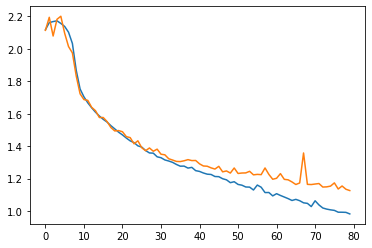

In [19]:
plt.plot(model1.kfcv_histories[0][0])
plt.plot(model1.kfcv_histories[0][1])